### Temporal Visualization

In this notebook we will be doing the data processing and analysis necessary to visualize temporal changes in the variables observed in `dataviz_edu` in the Riverside-San Bernadino-Ontario CA MSA.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plot
import process_edu as pe
import seaborn as sns
%matplotlib inline
sns.set(font='times new roman')
current_palette = sns.color_palette()
sns.set_palette([current_palette[2],current_palette[0], current_palette[1]])
pd.set_option('display.max_rows', 500)

In [2]:
def gen_frame():
    week_list = range(1,12)
    frame_list = []
    for weeks in week_list:
        frame_list.append(pe.process_edu(weeks,'Riverside_Metro_Area'))
        
    frame_dict = dict(zip(week_list,frame_list))    
    return frame_dict

In [3]:
rvrace_dict = gen_frame()
rvincome_dict = gen_frame()

In [4]:
#create frame where each row is total of that spatial scale
rvrace_rows = ['Hispanic or Latino (may be of any race)','White alone, not Hispanic','Black alone, not Hispanic',
            'Asian alone, not Hispanic','Two or more races + Other races, not Hispanic',]
# The rows in this dataframe need \\ due to need to escape Mathjax expresssion
rvincome_rows = ['Less than \\$25,000', '\\$25,000 - \\$34,999',
               '\\$35,000 - \\$49,999', '\\$50,000 - \\$74,999', '\\$75,000 - \\$99,999',
               '\\$100,000 - \\$149,999', '\\$150,000 - \\$199,999', '\\$200,000 and above',]
for weeks in rvincome_dict.keys():
    rvincome_dict[weeks] = rvincome_dict[weeks].loc[rvincome_rows]
for weeks in rvrace_dict.keys():
    rvrace_dict[weeks] = rvrace_dict[weeks].loc[rvrace_rows]

In [5]:
rvrace_dframe = pd.DataFrame()
rvincome_dframe = pd.DataFrame()

In [6]:
#create dataframes out of dict of dataframes
for weeks in range(1,12):
    rvrace_dframe = rvrace_dframe.append(rvrace_dict[weeks])
rvrace_dframe.insert(0, 'Week', True)

for weeks in range(1,12):
    rvincome_dframe = rvincome_dframe.append(rvincome_dict[weeks])
rvincome_dframe.insert(0, 'Week', True) 

In [7]:
rvincome_dframe['Week']= ['Week 1','Week 1','Week 1','Week 1','Week 1','Week 1','Week 1','Week 1',
                         'Week 2','Week 2','Week 2','Week 2','Week 2','Week 2','Week 2','Week 2',
                         'Week 3','Week 3','Week 3','Week 3','Week 3', 'Week 3','Week 3','Week 3',
                         'Week 4','Week 4','Week 4','Week 4','Week 4', 'Week 4','Week 4','Week 4',
                         'Week 5','Week 5','Week 5','Week 5','Week 5', 'Week 5','Week 5','Week 5',
                         'Week 6','Week 6','Week 6','Week 6','Week 6', 'Week 6','Week 6','Week 6',
                         'Week 7','Week 7','Week 7','Week 7','Week 7', 'Week 7','Week 7','Week 7',
                         'Week 8','Week 8','Week 8','Week 8','Week 8', 'Week 8','Week 8','Week 8',
                         'Week 9','Week 9','Week 9','Week 9','Week 9', 'Week 9','Week 9','Week 9',
                         'Week 10','Week 10','Week 10','Week 10','Week 10','Week 10','Week 10','Week 10',
                         'Week 11','Week 11','Week 11','Week 11','Week 11','Week 11','Week 11','Week 11']
rvrace_dframe['Week']= ['Week 1','Week 1','Week 1','Week 1','Week 1',
                         'Week 2','Week 2','Week 2','Week 2','Week 2',
                         'Week 3','Week 3','Week 3','Week 3','Week 3',
                         'Week 4','Week 4','Week 4','Week 4','Week 4',
                         'Week 5','Week 5','Week 5','Week 5','Week 5',
                         'Week 6','Week 6','Week 6','Week 6','Week 6',
                         'Week 7','Week 7','Week 7','Week 7','Week 7',
                         'Week 8','Week 8','Week 8','Week 8','Week 8',
                         'Week 9','Week 9','Week 9','Week 9','Week 9',
                         'Week 10','Week 10','Week 10','Week 10','Week 10',
                         'Week 11','Week 11','Week 11','Week 11','Week 11']

In [8]:
race_index = rvrace_dframe[['Week']]
income_index = rvincome_dframe[['Week']]

In [9]:
# create MultiIndex in order to more easily select data for graph
race_index.index.rename('Race',inplace=True)
race_index.reset_index(inplace=True)
race_index = race_index[['Week','Race']]
race_index = pd.MultiIndex.from_frame(race_index)
rvrace_dframe.index = race_index
rvrace_dframe.drop(columns=['Total','Week'],inplace=True)

# Income
income_index.index.rename('Race',inplace=True)
income_index.reset_index(inplace=True)
income_index = income_index[['Week','Race']]
income_index = pd.MultiIndex.from_frame(income_index)
rvincome_dframe.index = income_index
rvincome_dframe.drop(columns=['Total','Week'],inplace=True)

In [10]:
rvrace_dframe

Provided by the children’s school or school district to use outside of school(device)  \
Week    Race                                                                                                                                   
Week 1  Hispanic or Latino (may be of any race)                                                   464292                                       
        White alone, not Hispanic                                                                 148286                                       
        Black alone, not Hispanic                                                                  15687                                       
        Asian alone, not Hispanic                                                                  42661                                       
        Two or more races + Other races, not Hispanic                                              12141                                       
Week 2  Hispanic or Latino (may be of any race)                                                   426199                                       
        White alone, not Hispanic                                                                 217167                                       
        Black alone, not Hispanic                                                                  31377                                       
        Asian alone, not Hispanic                                                                   9916                                       
        Two or more races + Other races, not Hispanic                                               2048                                       
Week 3  Hispanic or Latino (may be of any race)                                                   304358                                       
        White alone, not Hispanic                                                                  91531                                       
        Black alone, not Hispanic                                                                  46687                                       
        Asian alone, not Hispanic                                                                   7122                                       
        Two or more races + Other races, not Hispanic                                              10595                                       
Week 4  Hispanic or Latino (may be of any race)                                                   396218                                       
        White alone, not Hispanic                                                                  62021                                       
        Black alone, not Hispanic                                                                  29096                                       
        Asian alone, not Hispanic                                                                  11575                                       
        Two or more races + Other races, not Hispanic                                              15008                                       
Week 5  Hispanic or Latino (may be of any race)                                                   348208                                       
        White alone, not Hispanic                                                                  93637                                       
        Black alone, not Hispanic                                                                  65869                                       
        Asian alone, not Hispanic                                                                  12277                                       
        Two or more races + Other races, not Hispanic                                              14021                                       
Week 6  Hispanic or Latino (may be of any race)                                                   341652                                       
        White alone, no

In [11]:
rvincome_dframe

Provided by the children’s school or school district to use outside of school(device)  \
Week    Race                                                                                                           
Week 1  Less than \$25,000                                                154951                                       
        \$25,000 - \$34,999                                                91369                                       
        \$35,000 - \$49,999                                               140798                                       
        \$50,000 - \$74,999                                                92409                                       
        \$75,000 - \$99,999                                               122037                                       
        \$100,000 - \$149,999                                              41122                                       
        \$150,000 - \$199,999                                              23733                                       
        \$200,000 and above                                                 9471                                       
Week 2  Less than \$25,000                                                 62510                                       
        \$25,000 - \$34,999                                                58839                                       
        \$35,000 - \$49,999                                                77111                                       
        \$50,000 - \$74,999                                               290526                                       
        \$75,000 - \$99,999                                               109163                                       
        \$100,000 - \$149,999                                              32423                                       
        \$150,000 - \$199,999                                              34586                                       
        \$200,000 and above                                                    0                                       
Week 3  Less than \$25,000                                                 63251                                       
        \$25,000 - \$34,999                                                64826                                       
        \$35,000 - \$49,999                                                99520                                       
        \$50,000 - \$74,999                                                79672                                       
        \$75,000 - \$99,999                                                79818                                       
        \$100,000 - \$149,999                                              20661                                       
        \$150,000 - \$199,999                                              20955                                       
        \$200,000 and above                                                11678                                       
Week 4  Less than \$25,000                                                 71231                                       
        \$25,000 - \$34,999                                               119680                                       
        \$35,000 - \$49,999                                                27613                                       
        \$50,000 - \$74,999                                                32225                                       
        \$75,000 - \$99,999                                               175379                                       
        \$100,000 - \$149,999                                              41883                                       
        \$150,000 - \$199,999                                              15557                                       
        \$200,000 and above                                            

In [12]:
graph_list=['% Provided by someone in the household or family, or it is the child’s(device)',
               '% Provided by the children’s school or school district to use outside of school(device)',
               '% Provided by another source(device)',
               '% Paid for by someone in the household or family(internet)',
               '% Paid for by the children’s school or school district(internet)',
               '% Paid for by another source(internet)']

In [13]:
race_list = ['Hispanic or Latino (may be of any race)',
             'White alone, not Hispanic',
             'Black alone, not Hispanic',
             'Asian alone, not Hispanic',
             'Two or more races + Other races, not Hispanic']

In [14]:
income_list = ['Less than \\$25,000',
               '\\$25,000 - \\$34,999',
               '\\$35,000 - \\$49,999',
               '\\$50,000 - \\$74,999',
               '\\$75,000 - \\$99,999',
               '\\$100,000 - \\$149,999',
               '\\$150,000 - \\$199,999',
               '\\$200,000 and above',]

# Race

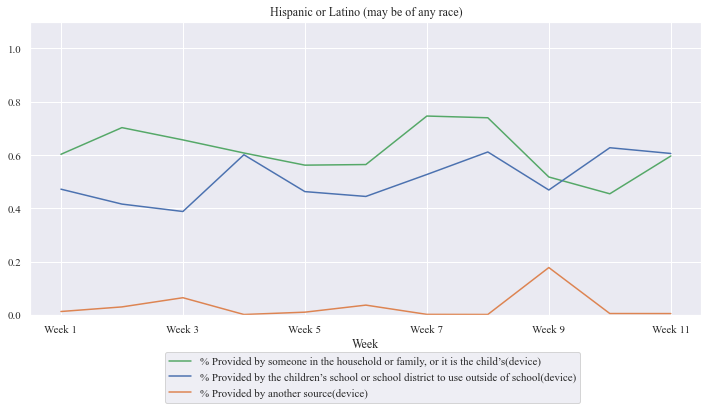

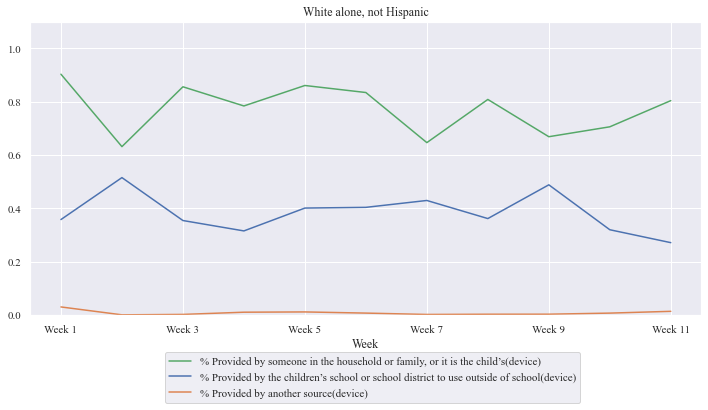

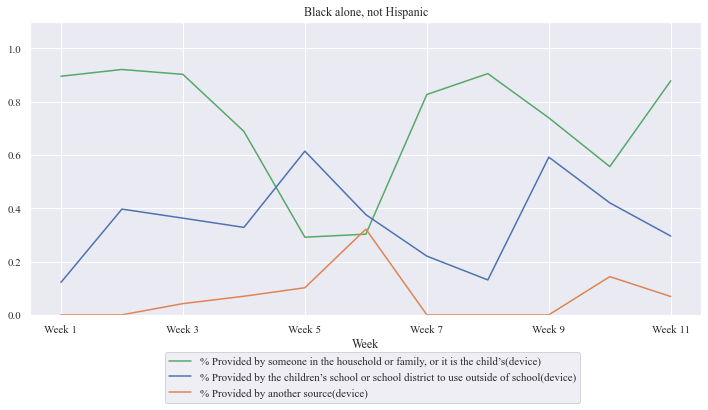

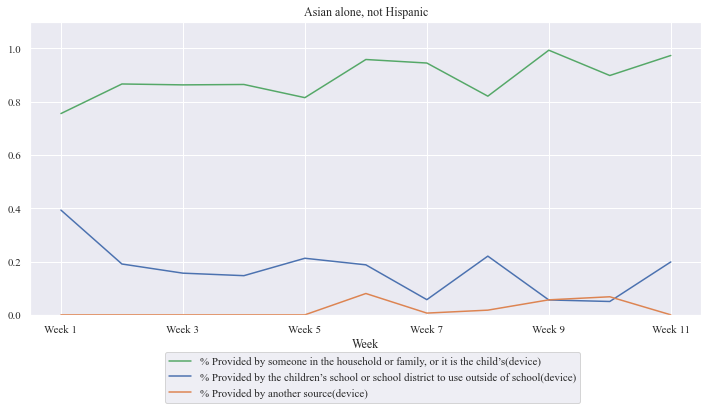

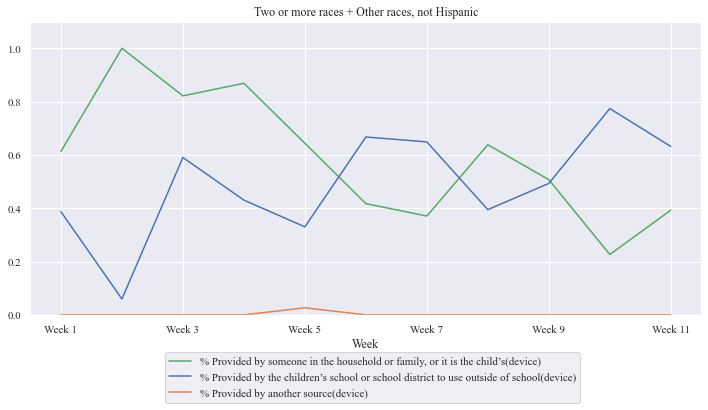

In [25]:
for races in race_list:
    rvrace_dframe.xs(races,level=1)[graph_list[:3]].plot(figsize=(10,6),ylim=(0,1.1))
    plot.title(races)
    plot.legend(bbox_to_anchor=(0.2, -0.3), loc='lower left',
               ncol=1, borderaxespad=0)
    #plot.set_xticks(range(1,12))
    plot.tight_layout()

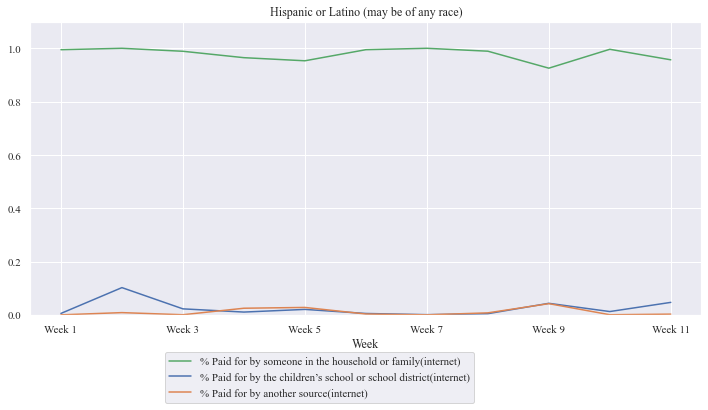

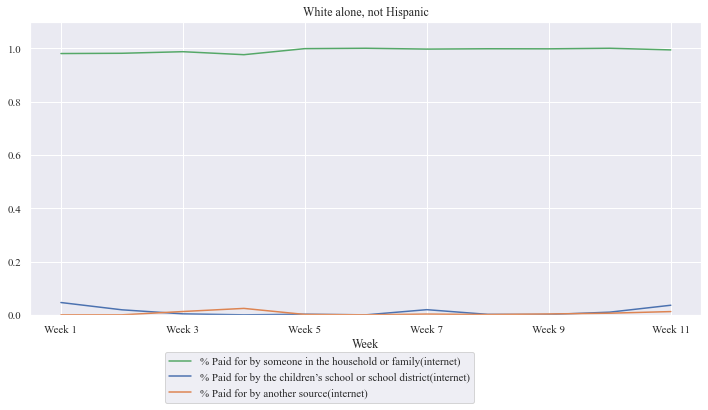

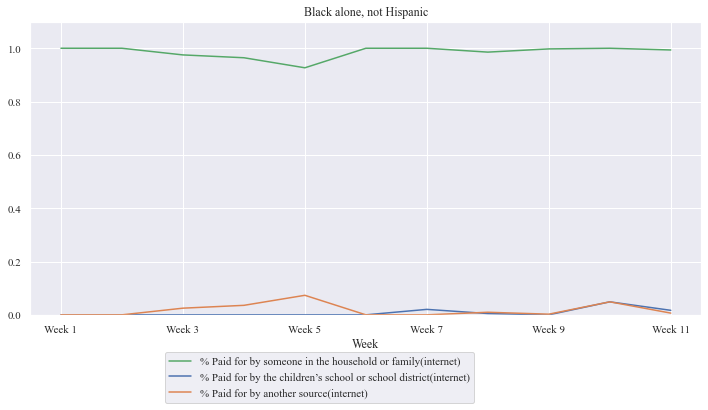

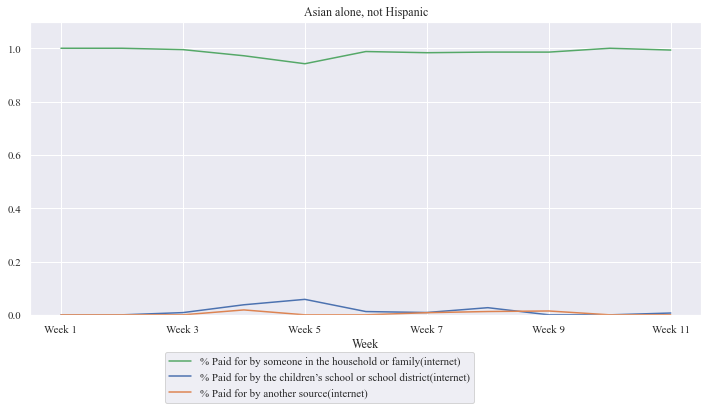

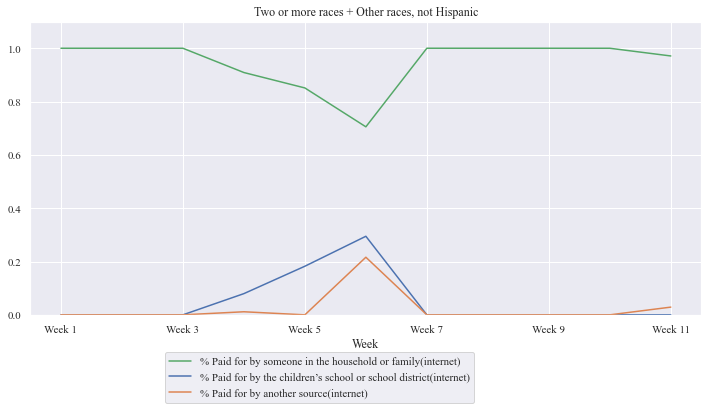

In [24]:
for races in race_list:
    rvrace_dframe.xs(races,level=1)[graph_list[3:]].plot(figsize=(10,6),ylim=(0,1.1))
    plot.title(races)
    plot.legend(bbox_to_anchor=(0.2, -0.3), loc='lower left',
               ncol=1, borderaxespad=0)
    plot.tight_layout()

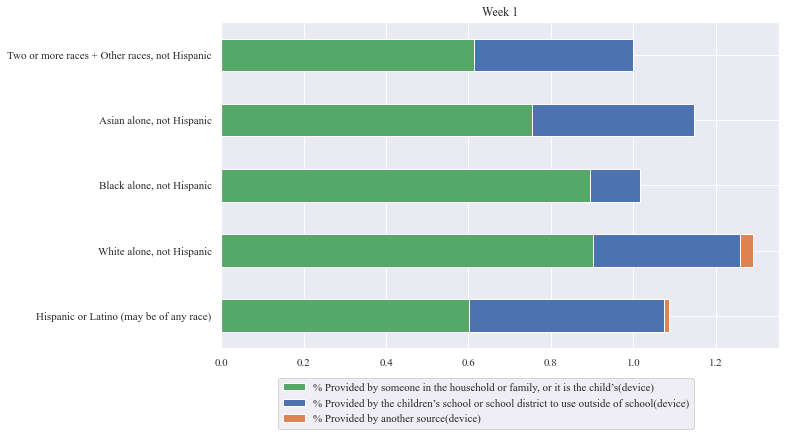

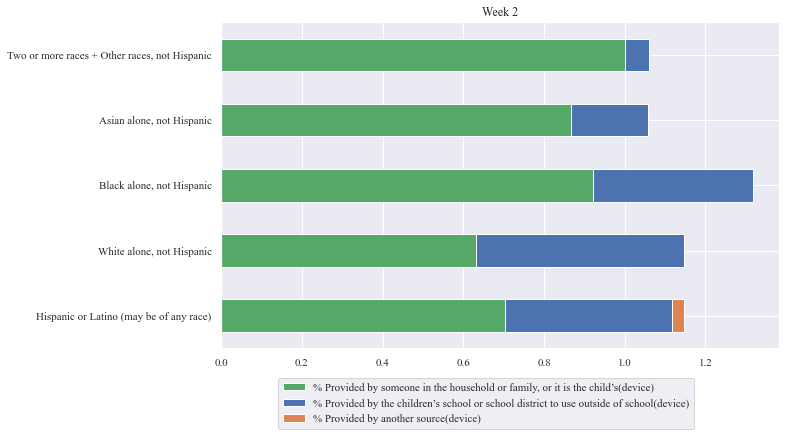

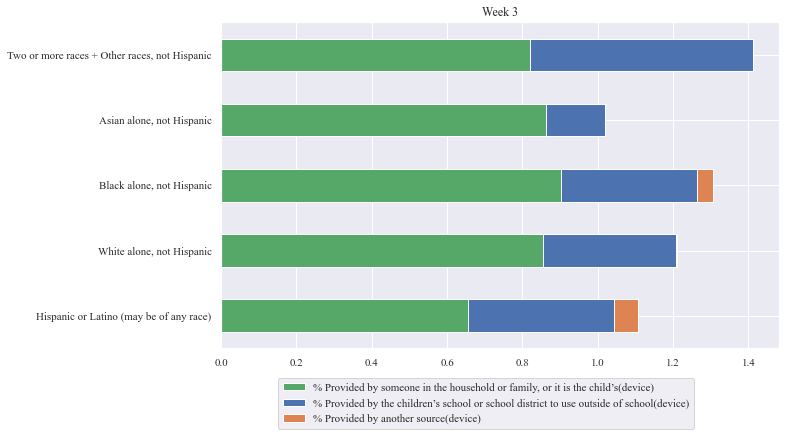

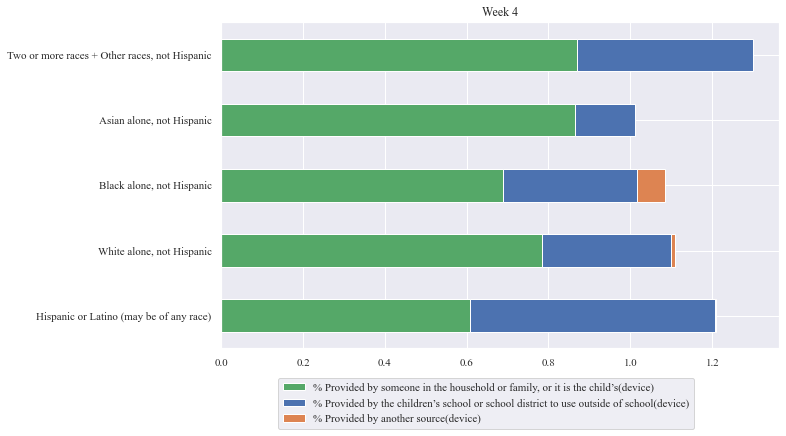

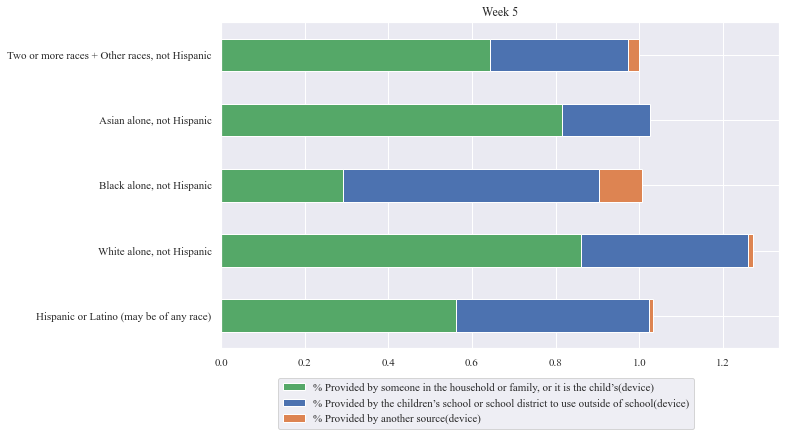

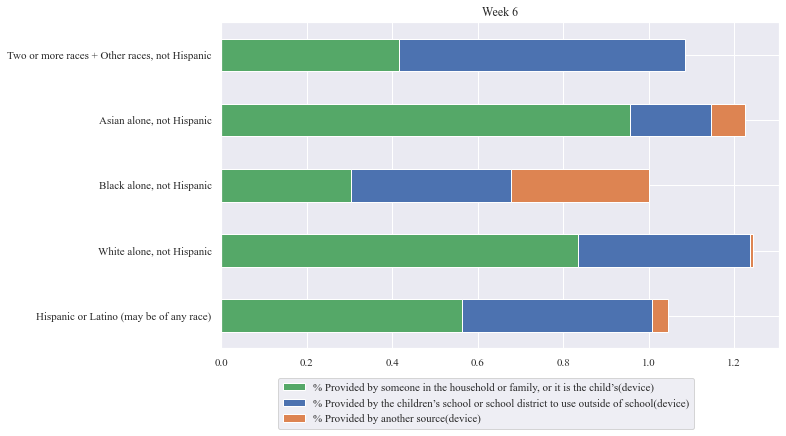

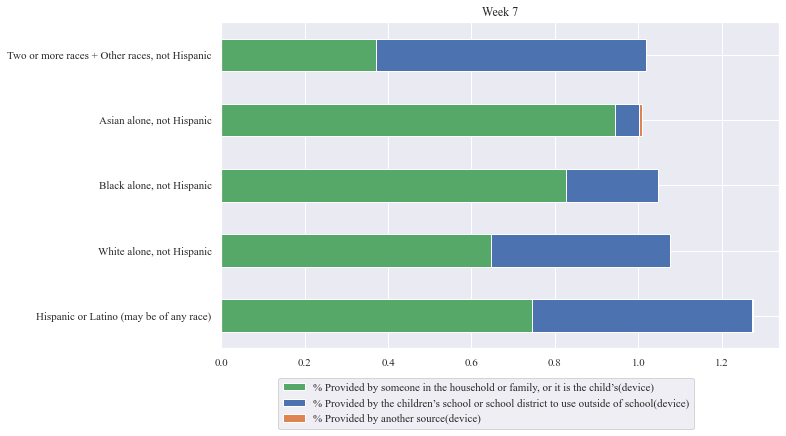

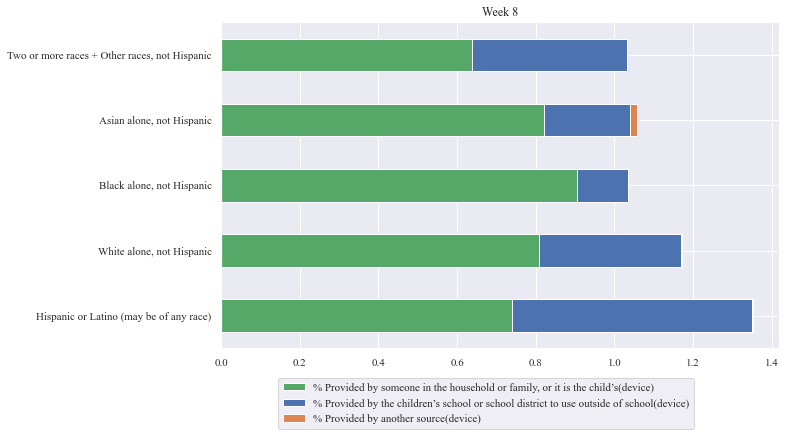

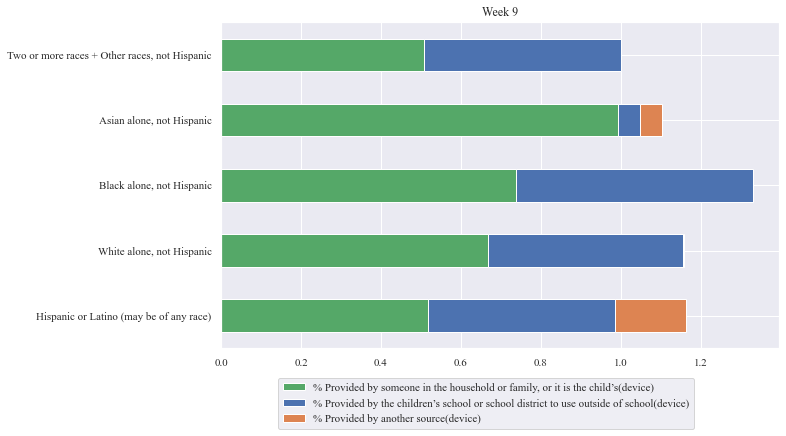

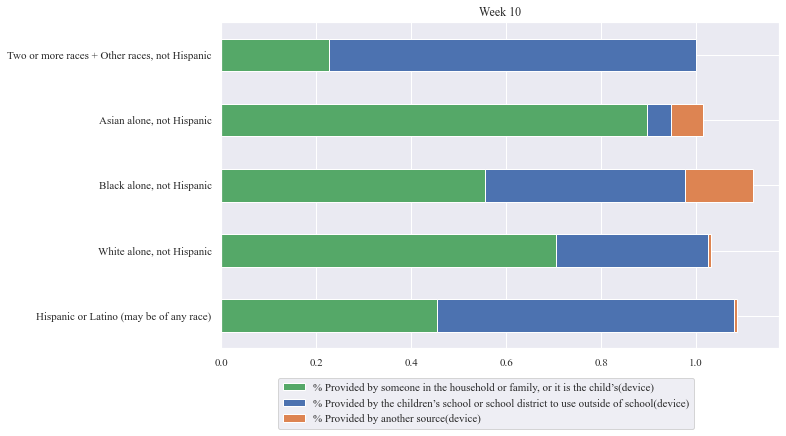

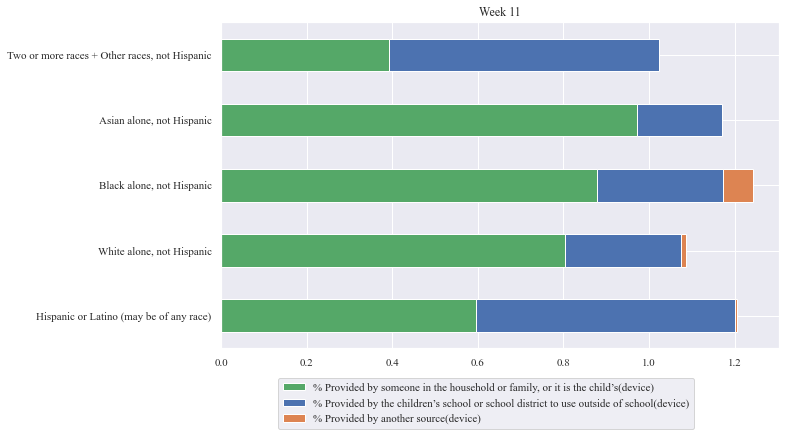

In [18]:
for weeks in rvrace_dict.keys():
    rvrace_dict[weeks][graph_list[0:3]].plot.barh(
        stacked=True, figsize=(10,6))
    plot.legend(bbox_to_anchor=(.1, -0.25), loc='lower left',
               ncol=1, borderaxespad=0.1)
    plot.title(f'Week {weeks}')

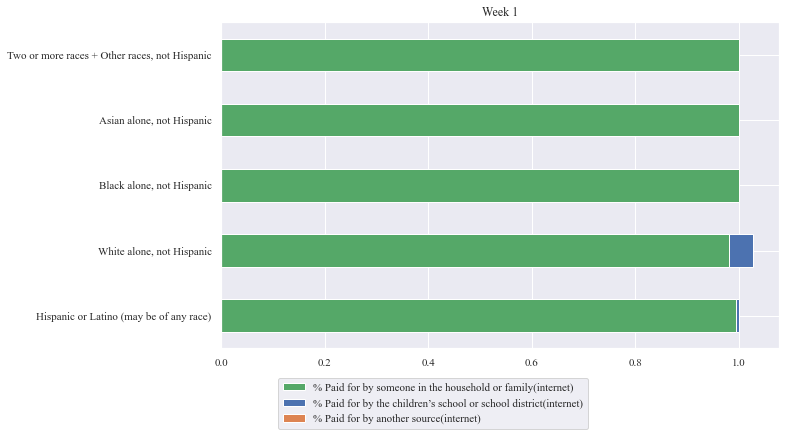

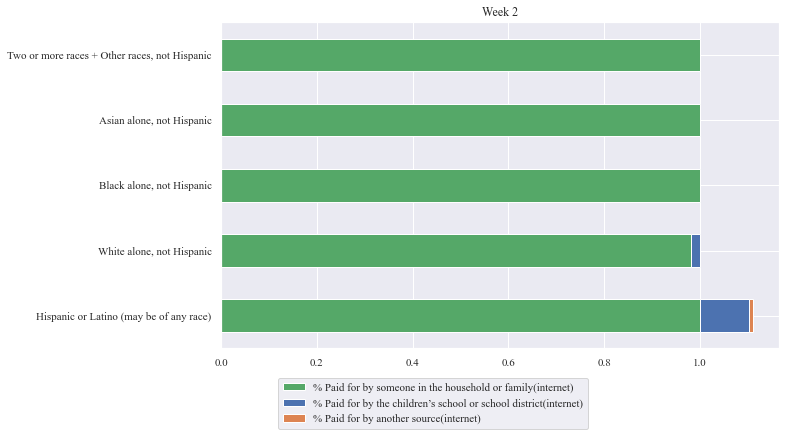

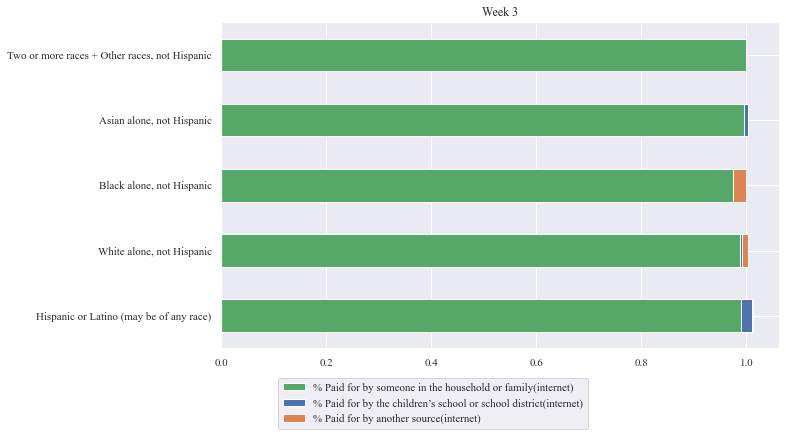

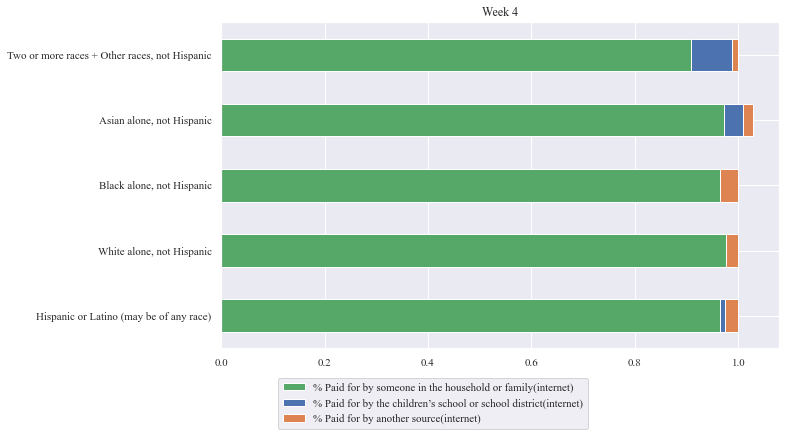

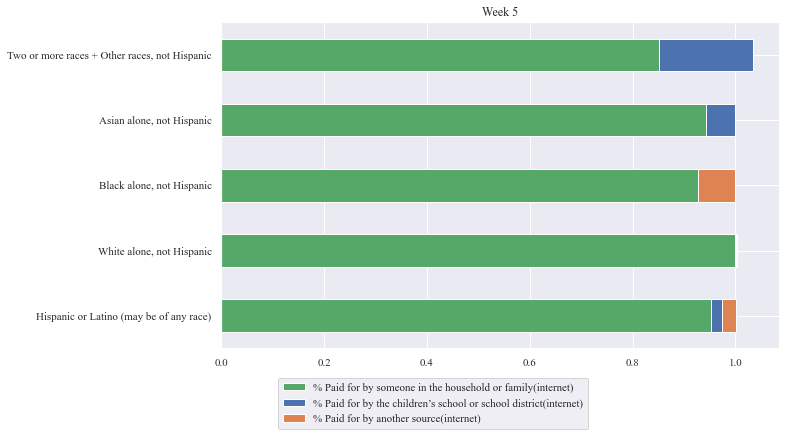

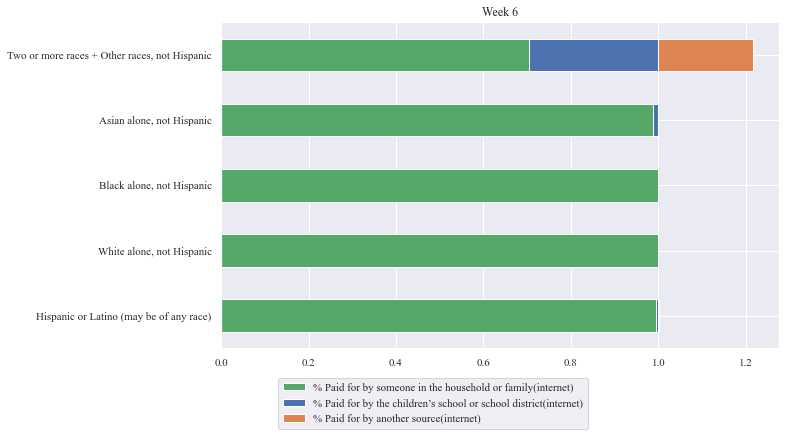

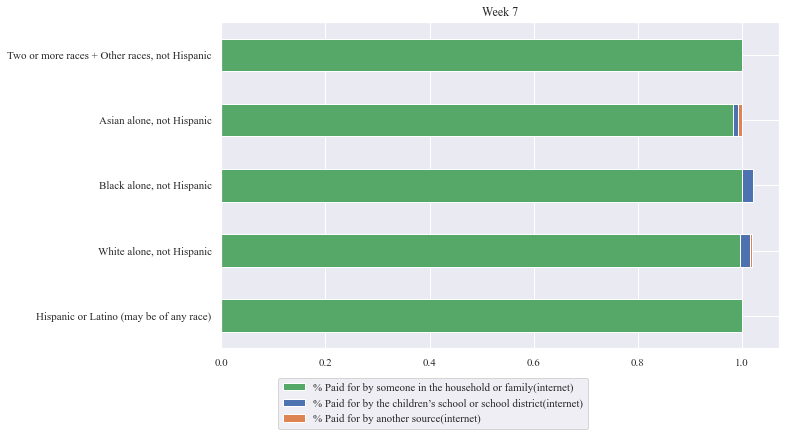

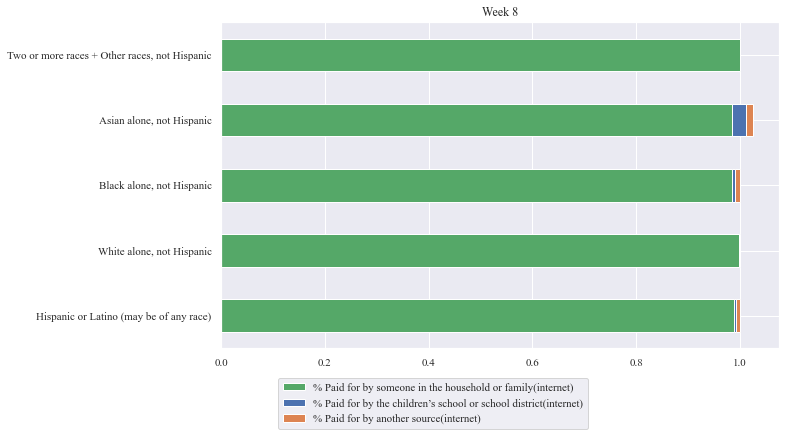

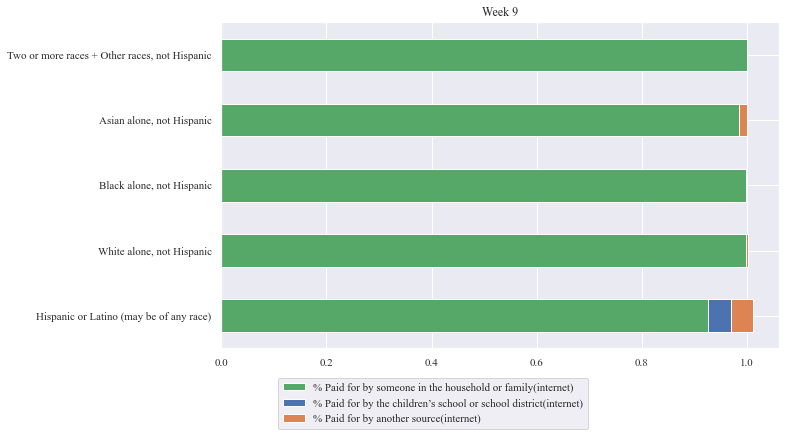

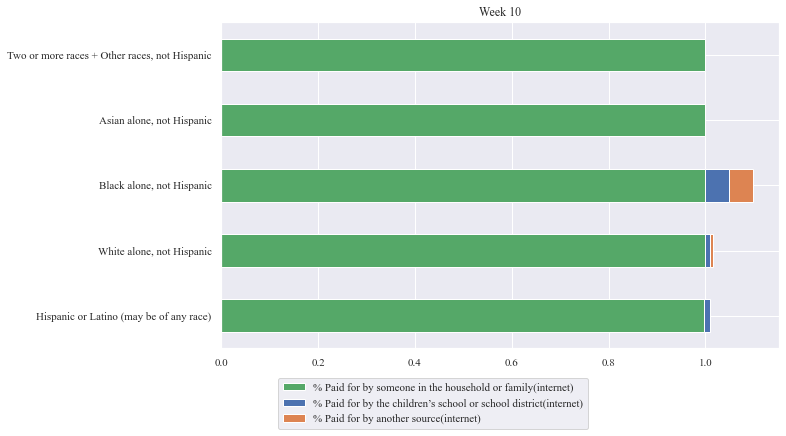

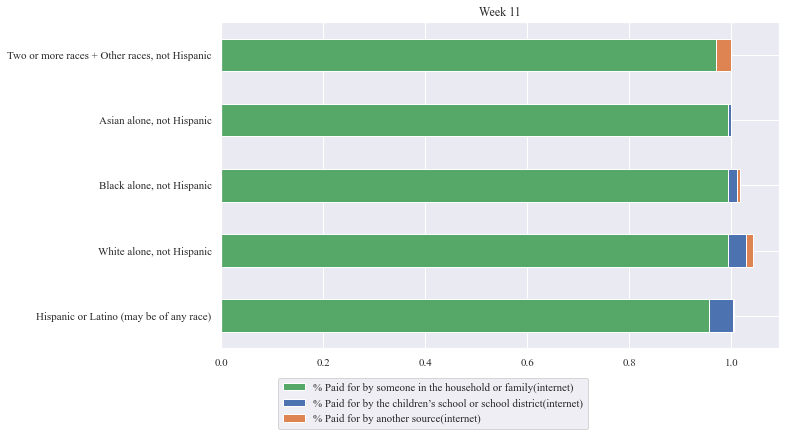

In [19]:
for weeks in rvrace_dict.keys():
    rvrace_dict[weeks][graph_list[3:]].plot.barh(
        stacked=True, figsize=(10,6))
    plot.legend(bbox_to_anchor=(.1, -0.25), loc='lower left',
               ncol=1, borderaxespad=0.1)
    plot.title(f'Week {weeks}')

# Income

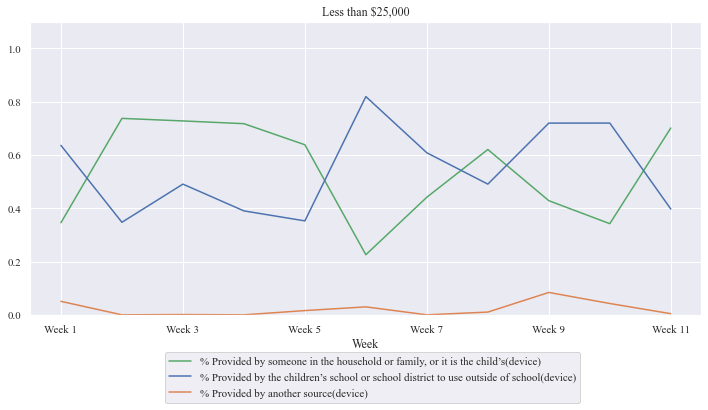

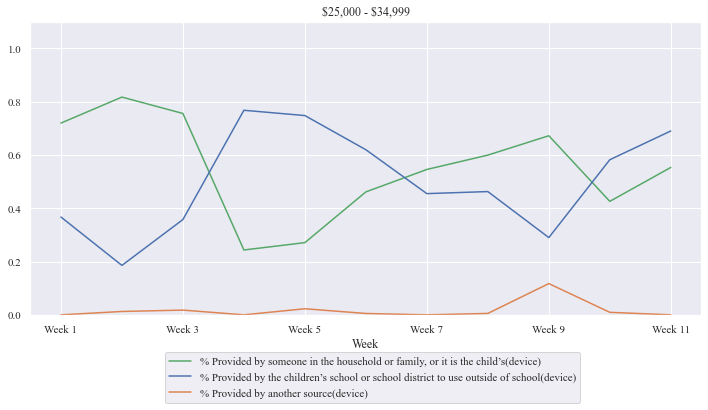

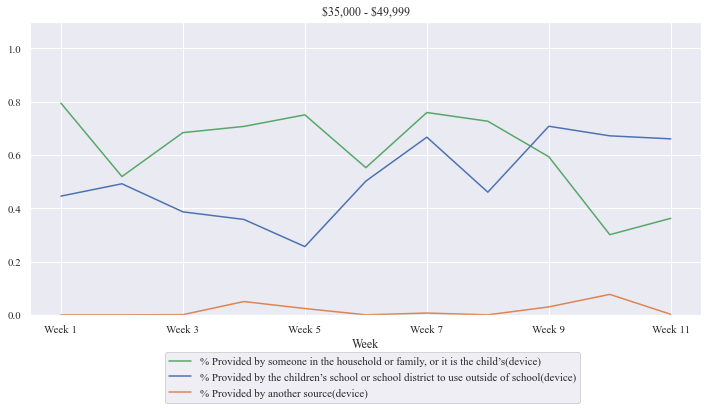

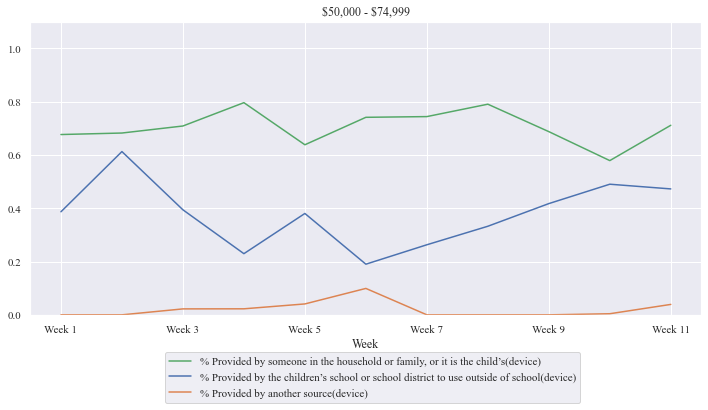

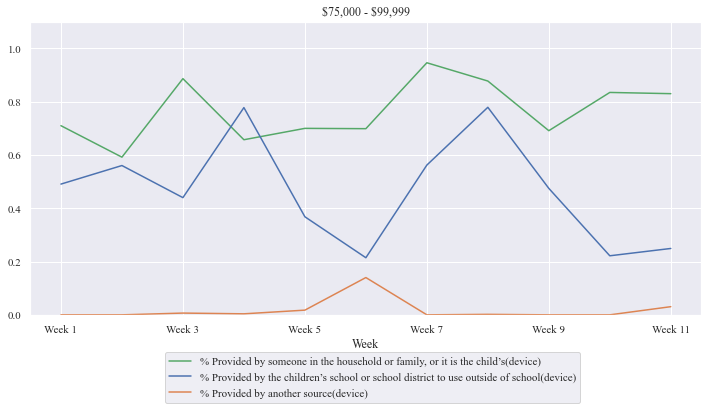

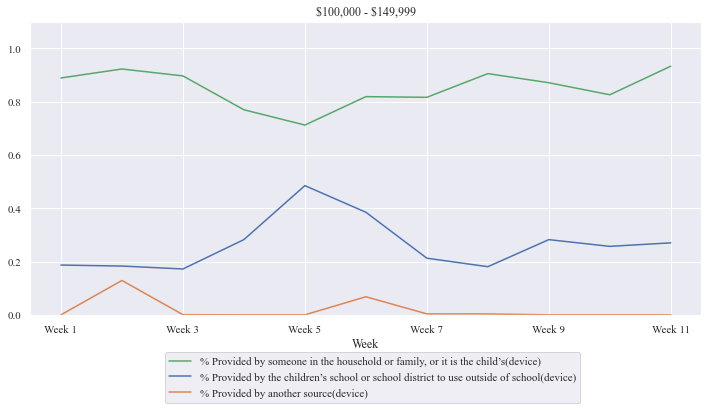

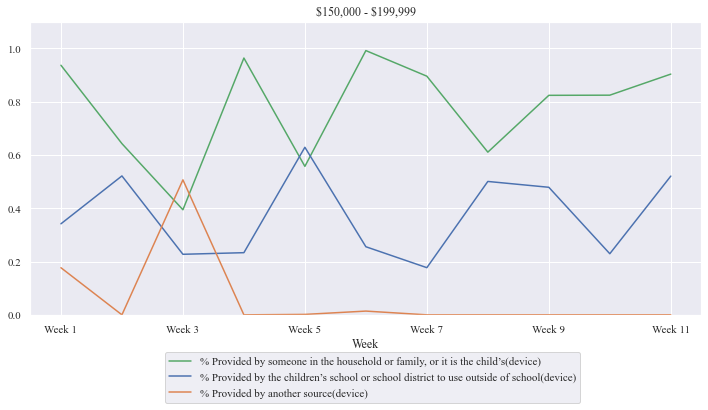

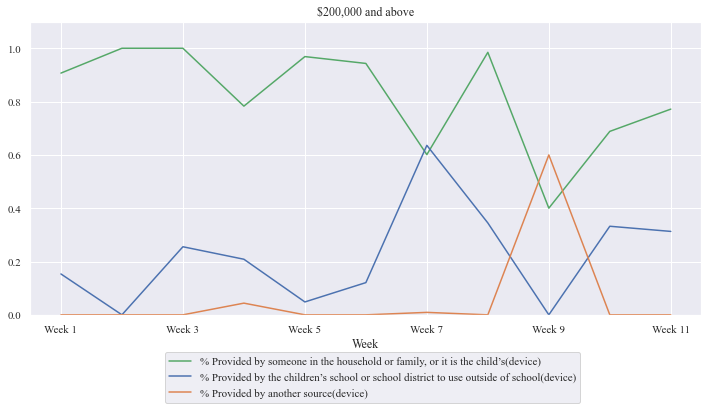

In [26]:
for incomes in income_list:
    rvincome_dframe.xs(incomes,level=1)[graph_list[:3]].plot(figsize=(10,6),ylim=(0,1.1))
    plot.title(incomes)
    plot.legend(bbox_to_anchor=(0.2, -0.3), loc='lower left',
               ncol=1, borderaxespad=0)
    plot.tight_layout()

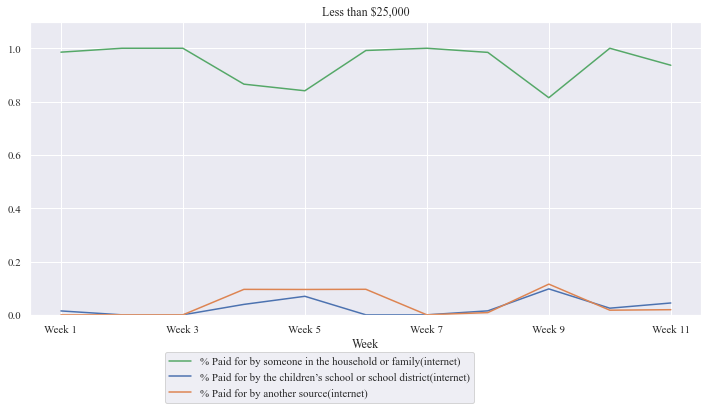

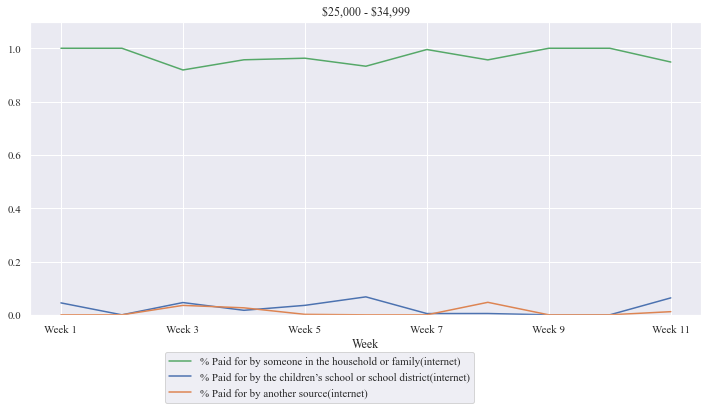

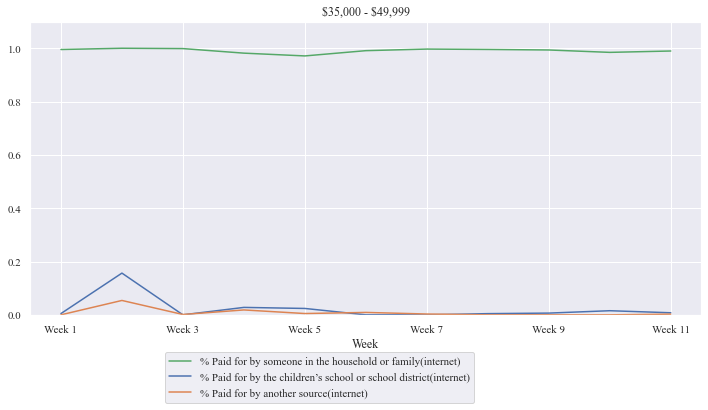

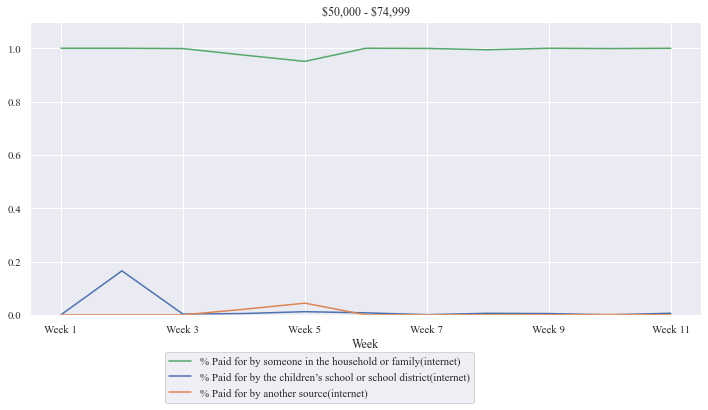

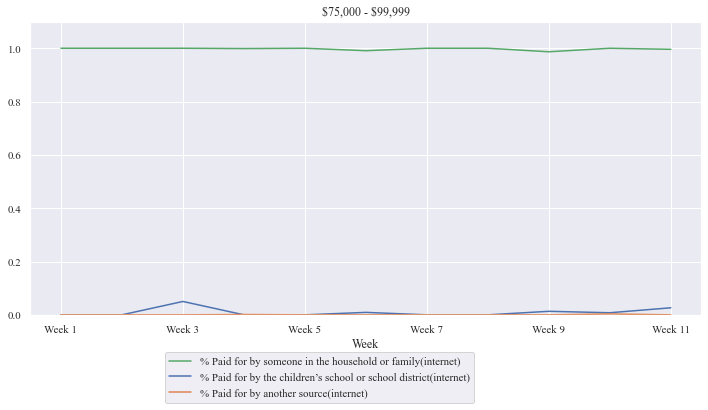

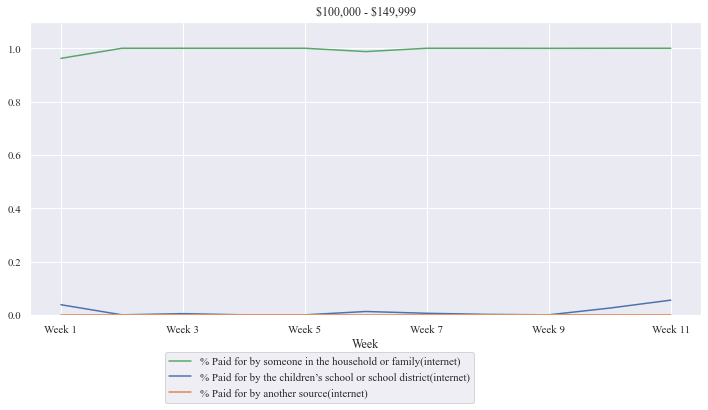

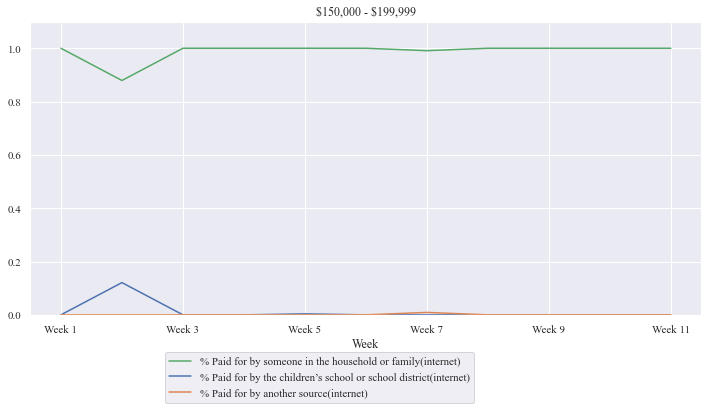

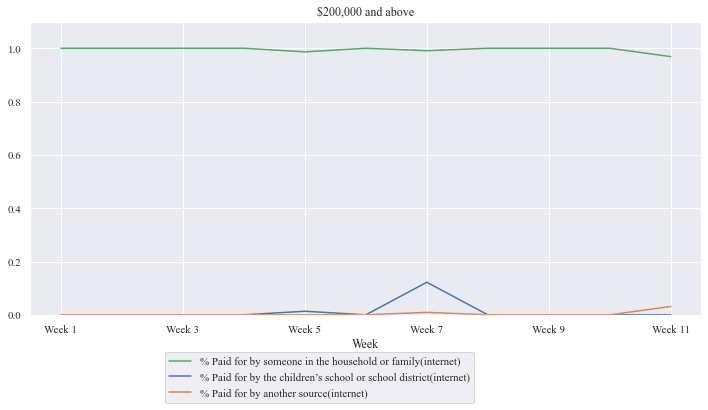

In [27]:
for incomes in income_list:
    rvincome_dframe.xs(incomes,level=1)[graph_list[3:]].plot(figsize=(10,6),ylim=(0,1.1))
    plot.title(incomes)
    plot.legend(bbox_to_anchor=(0.2, -0.3), loc='lower left',
               ncol=1, borderaxespad=0)
    plot.tight_layout()

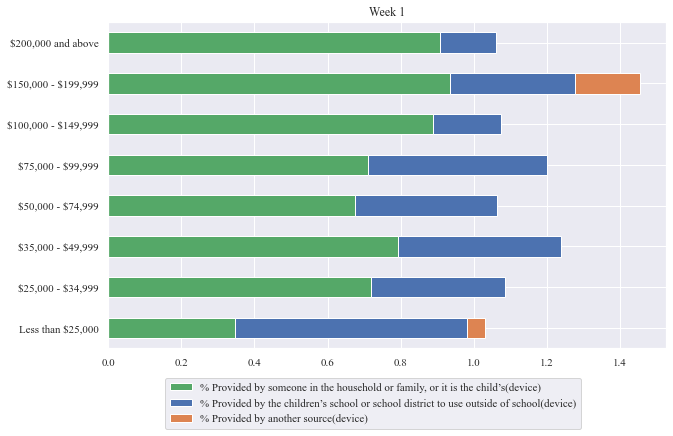

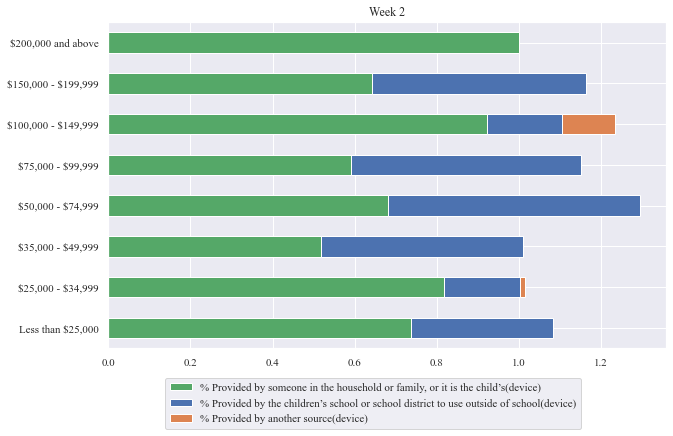

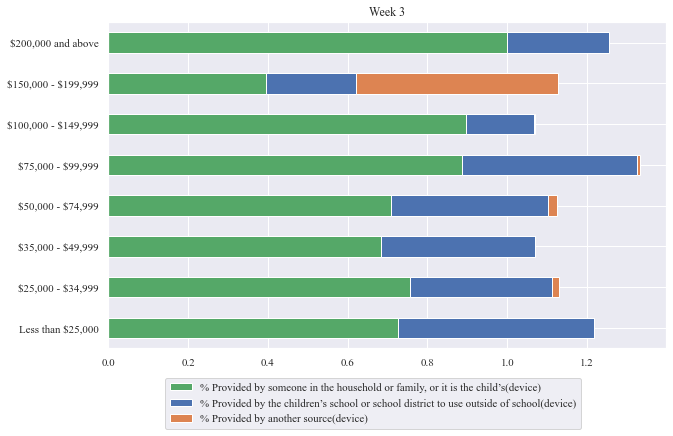

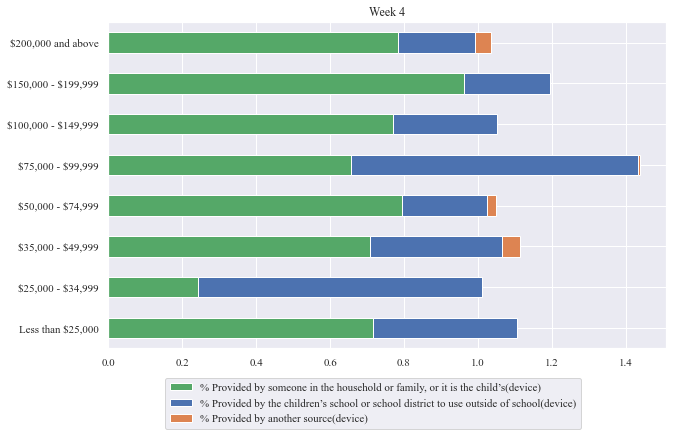

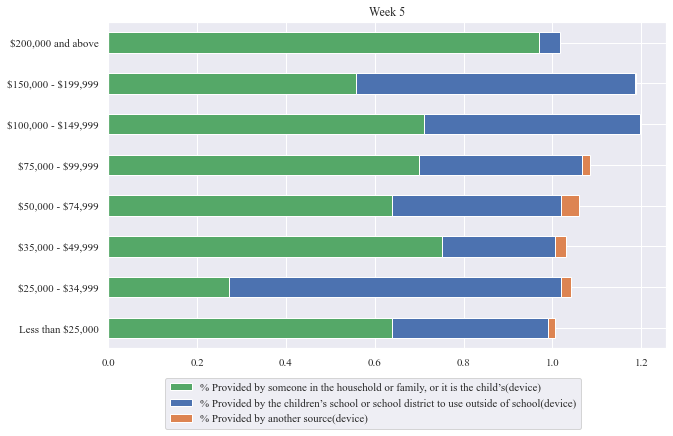

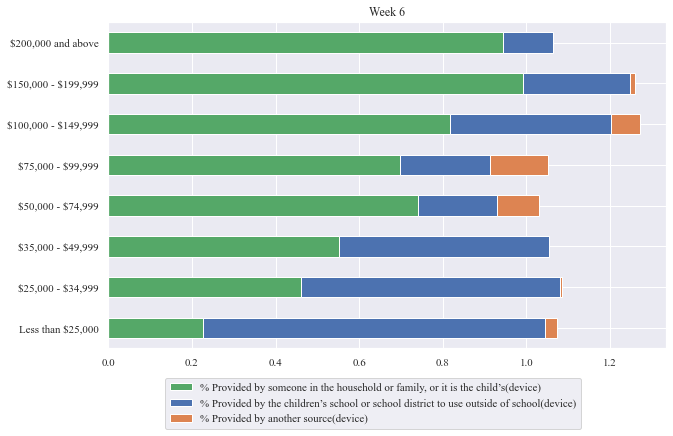

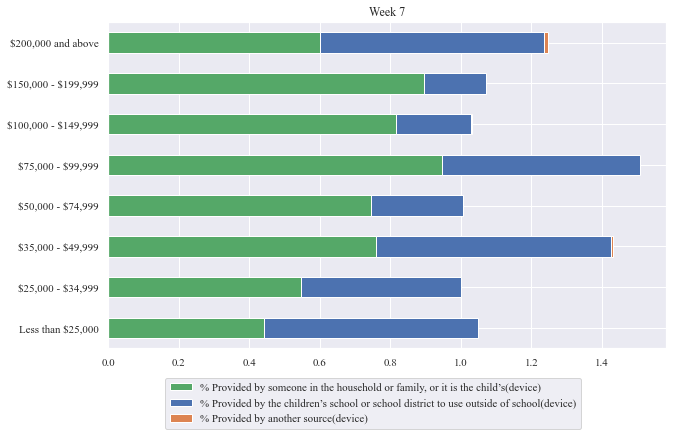

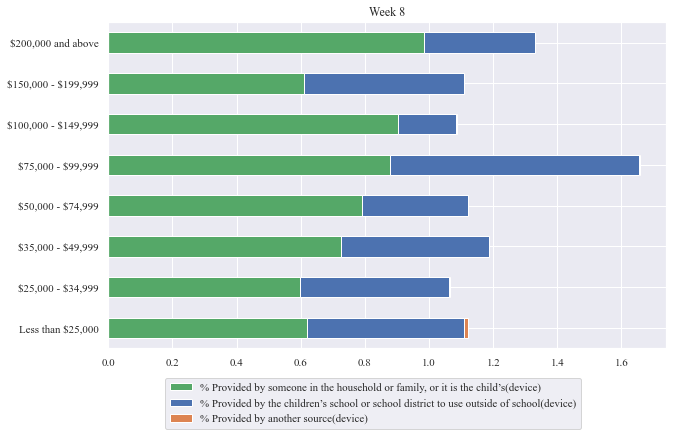

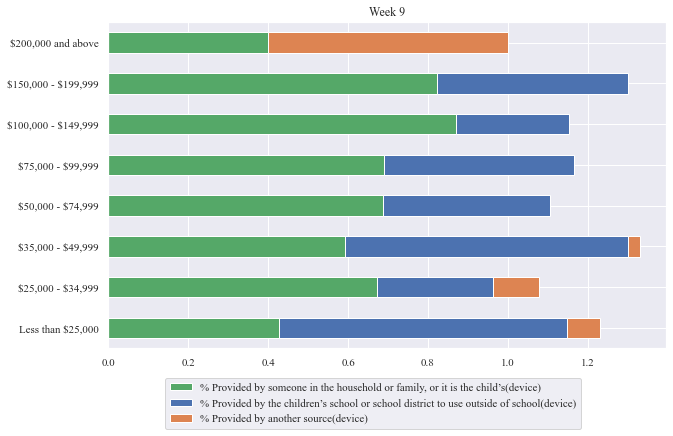

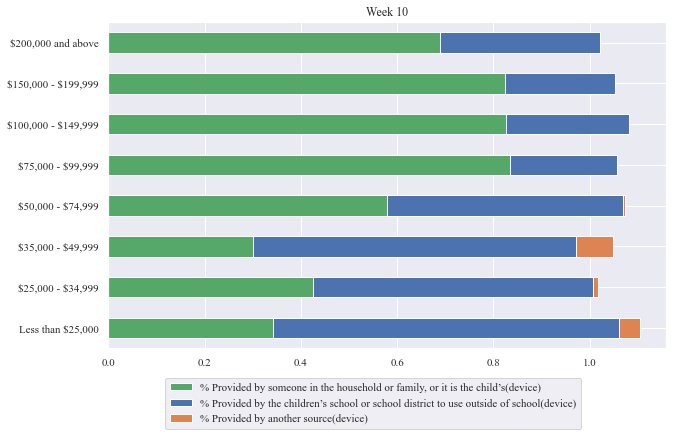

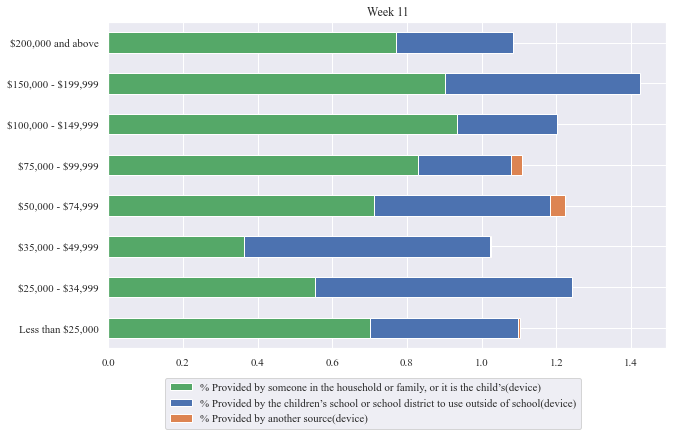

In [22]:
for weeks in rvincome_dict.keys():
    rvincome_dict[weeks][graph_list[:3]].plot.barh(
        stacked=True, figsize=(10,6))
    plot.legend(bbox_to_anchor=(.1, -0.25), loc='lower left',
               ncol=1, borderaxespad=0.1)
    plot.title(f'Week {weeks}')

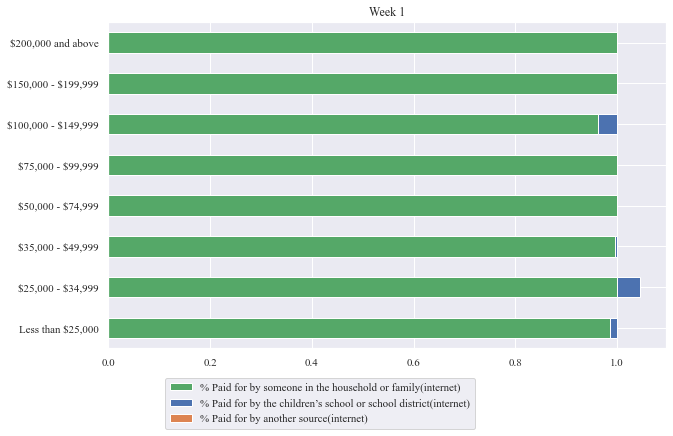

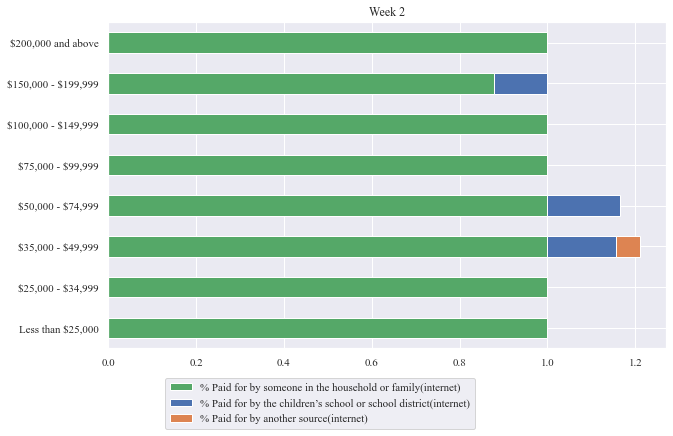

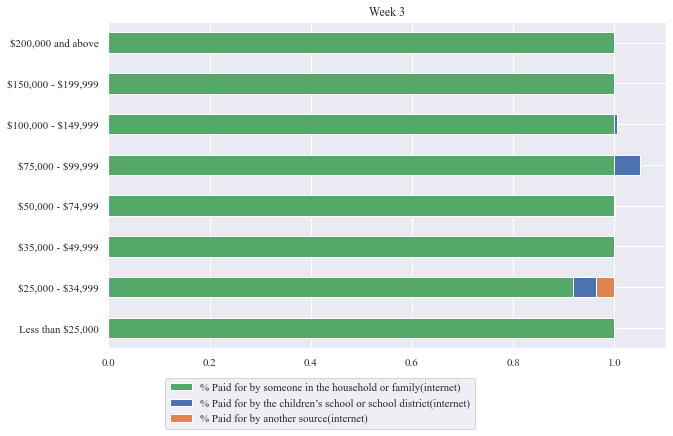

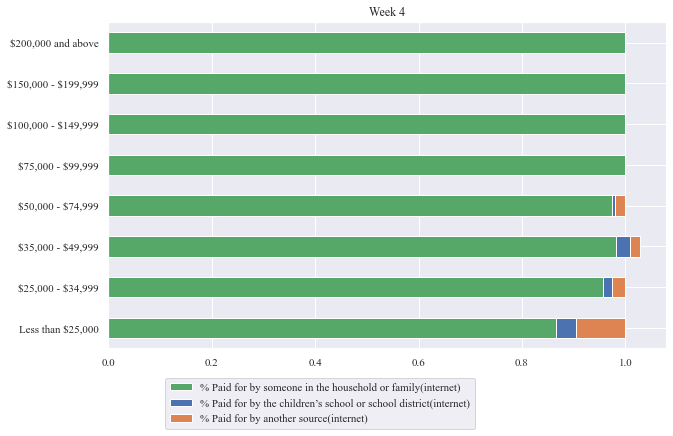

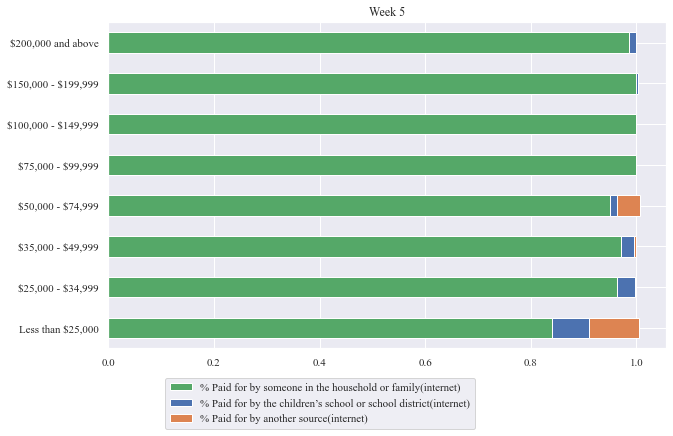

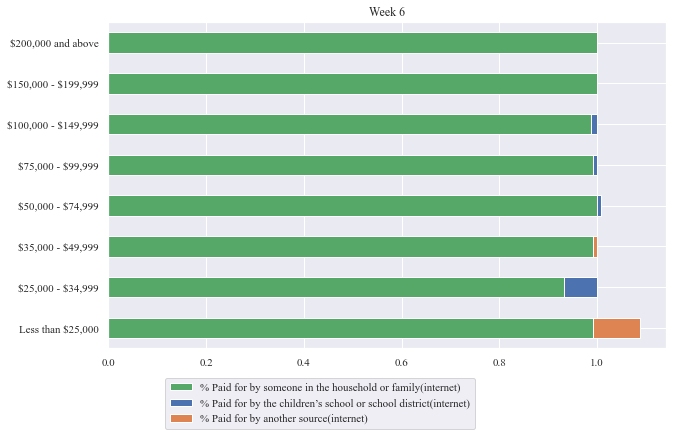

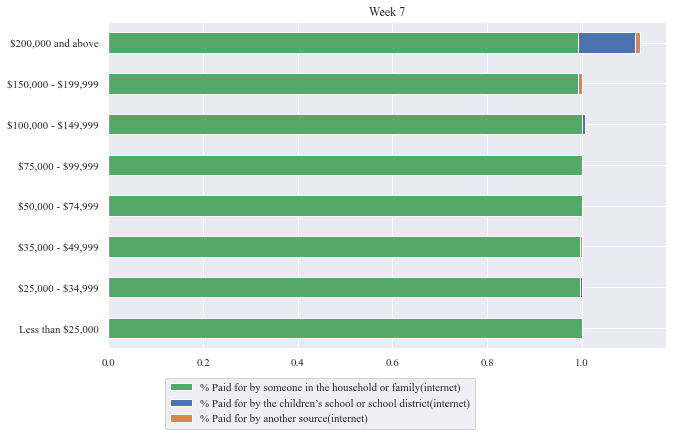

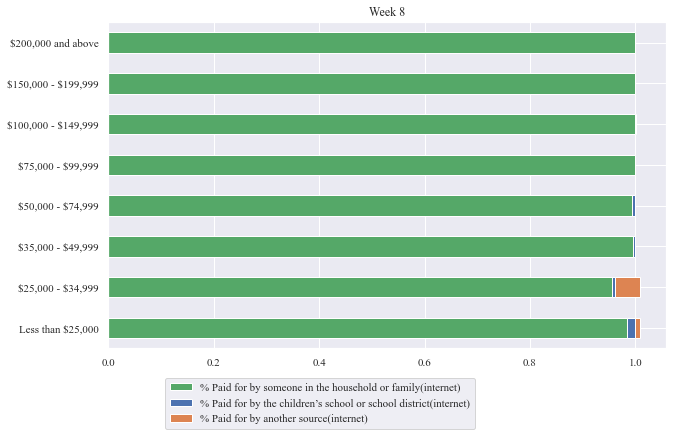

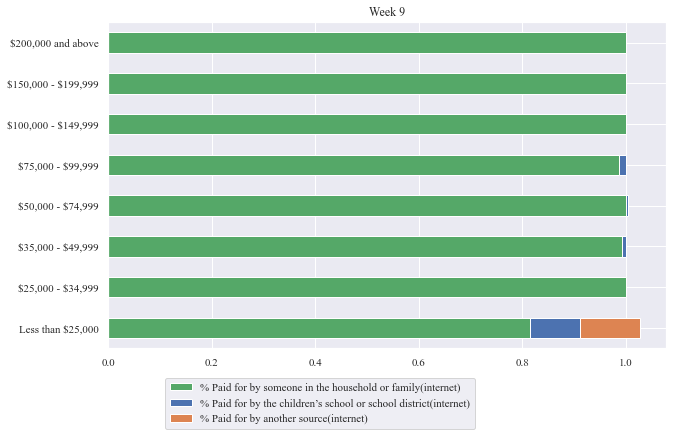

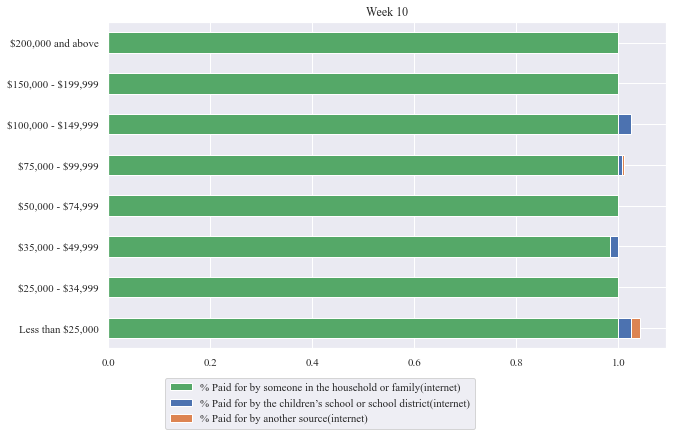

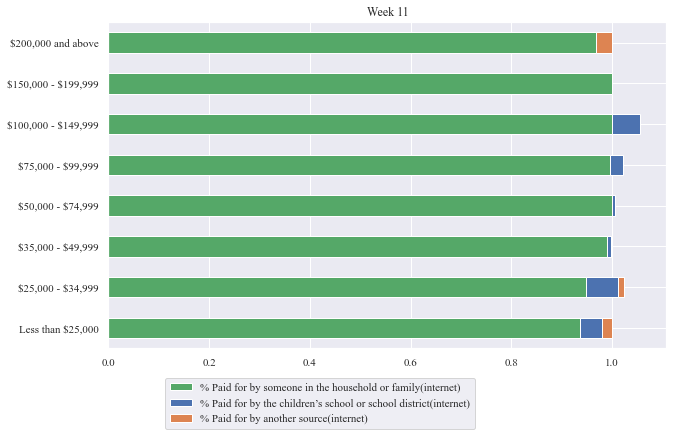

In [23]:
for weeks in rvincome_dict.keys():
    rvincome_dict[weeks][graph_list[3:]].plot.barh(
        stacked=True, figsize=(10,6))
    plot.legend(bbox_to_anchor=(.1, -0.25), loc='lower left',
               ncol=1, borderaxespad=0.1)
    plot.title(f'Week {weeks}')